In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
extent = Barents['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64, kernel_constraint=MaxNorm(1.0), activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [9]:
cp = ModelCheckpoint('Barents_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1924 - root_mean_squared_error: 0.4386

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 9s 107ms/step - loss: 0.1916 - root_mean_squared_error: 0.4378 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2594
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1589 - root_mean_squared_error: 0.3986

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.1528 - root_mean_squared_error: 0.3908 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2364
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1271 - root_mean_squared_error: 0.3565

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.1229 - root_mean_squared_error: 0.3506 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2155
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1009 - root_mean_squared_error: 0.3177

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1009 - root_mean_squared_error: 0.3177 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1977
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0799 - root_mean_squared_error: 0.2826

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0793 - root_mean_squared_error: 0.2815 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815
Epoch 6/50
52/53 [============================>.] - ETA: 0s - loss: 0.0607 - root_mean_squared_error: 0.2463

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0613 - root_mean_squared_error: 0.2475 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1701
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0466 - root_mean_squared_error: 0.2159

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0459 - root_mean_squared_error: 0.2143 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1590
Epoch 8/50
52/53 [============================>.] - ETA: 0s - loss: 0.0360 - root_mean_squared_error: 0.1897

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0358 - root_mean_squared_error: 0.1891 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1480
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0277 - root_mean_squared_error: 0.1663

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0273 - root_mean_squared_error: 0.1653 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1629

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1371

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0182 - root_mean_squared_error: 0.1351 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1293

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0165 - root_mean_squared_error: 0.1283 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1219

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 14/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1181

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0137 - root_mean_squared_error: 0.1170 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0787
Epoch 15/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1161

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0135 - root_mean_squared_error: 0.1164 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1200

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0159 - root_mean_squared_error: 0.1260 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0738
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 19/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1125

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
Epoch 20/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1179

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 22/50
52/53 [============================>.] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1116

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 23/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0644
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0162 - root_mean_squared_error: 0.1274 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 28/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0043 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1138 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 32/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 33/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 34/50
52/53 [============================>.] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1150

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 37/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1055

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 39/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 40/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0636
Epoch 41/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 42/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0041 - val_root_mean_square

INFO:tensorflow:Assets written to: Barents_model\assets


INFO:tensorflow:Assets written to: Barents_model\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0085 - root_mean_squared_error: 0.0924 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614


In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

2.214396051565806 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

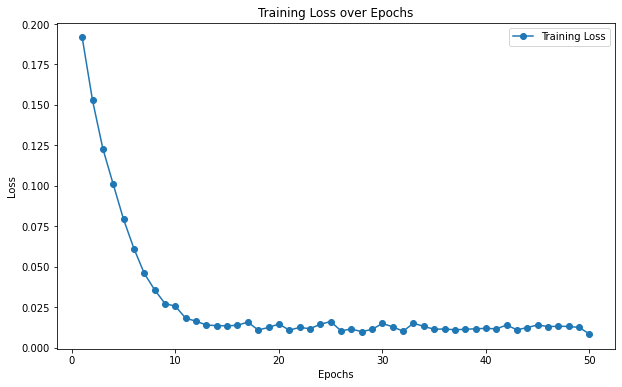

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

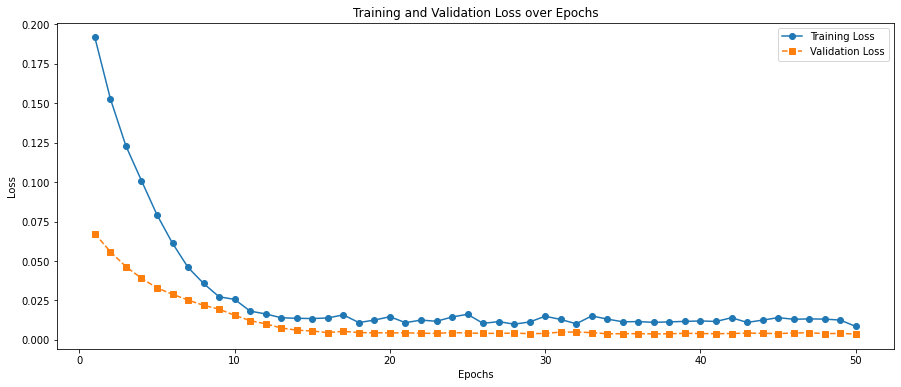

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.061033944172660524
MAE : 0.04612726236916771


In [17]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [18]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,439195.062500,440856.132
1,236442.781250,265975.112
2,115469.679688,112300.019
3,48271.464844,44787.893
4,28322.839844,14909.156
5,61028.617188,54595.378
6,162922.531250,242829.930
7,367269.250000,406860.687
8,538731.312500,605897.837
9,725132.812500,654073.790


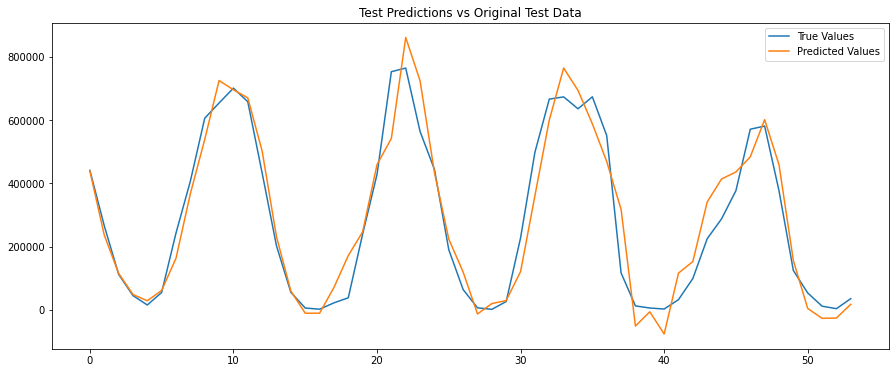

In [19]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [9]:
predictions = model1.predict(X)

17/17 [==============================] - 1s 5ms/step


In [10]:
mse = mean_squared_error(y, predictions)
print(mse)

0.0038016492112446522


In [11]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.048295597575249705


In [12]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

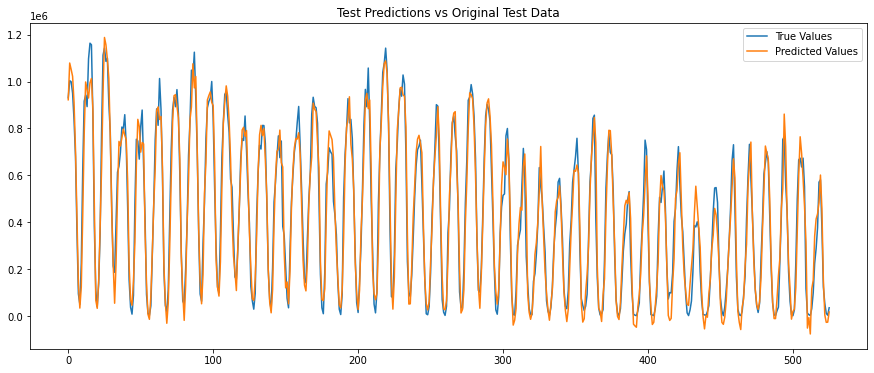

In [13]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()